# Flight Price Prediction:

### Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

### FEATURES:


Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket.

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [150]:
pd.set_option('display.max_columns', None)

In [151]:
train_df = pd.read_excel('Data_Train.xlsx')

In [152]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [153]:
train_df.shape

(10683, 11)

In [154]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


From above observation we can say that all are object data types and there is one null values in the route and Total_stops column.

In [155]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [156]:
train_df.dropna(inplace=True)

<AxesSubplot:>

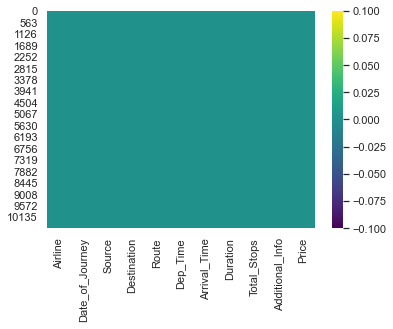

In [157]:
sns.heatmap(train_df.isnull(), cmap = 'viridis')

As we can see now there is no null values present in our Datasets.


In [158]:
train_df['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [159]:
train_df['Journey_day']=pd.to_datetime(train_df.Date_of_Journey,format='%d/%m/%Y').dt.day
train_df['Journey_month']=pd.to_datetime(train_df['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [160]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [161]:
train_df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [162]:
## Extracting Hours and minutes
train_df['Dep_hour']=pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df['Dep_min']=pd.to_datetime(train_df['Dep_Time']).dt.minute
train_df.drop(['Dep_Time'],axis=1,inplace=True)

In [163]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [164]:
train_df['Arrival_hour']=pd.to_datetime(train_df['Arrival_Time']).dt.hour
train_df['Arrival_min']=pd.to_datetime(train_df['Arrival_Time']).dt.minute
train_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [165]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [166]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [167]:
train_df['Duration_hours']=duration_hours
train_df['Duration_mins']=duration_mins

In [168]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [169]:
train_df.drop(['Duration'],axis=1,inplace=True)

In [170]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Handling Categorical Columns

In [171]:
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

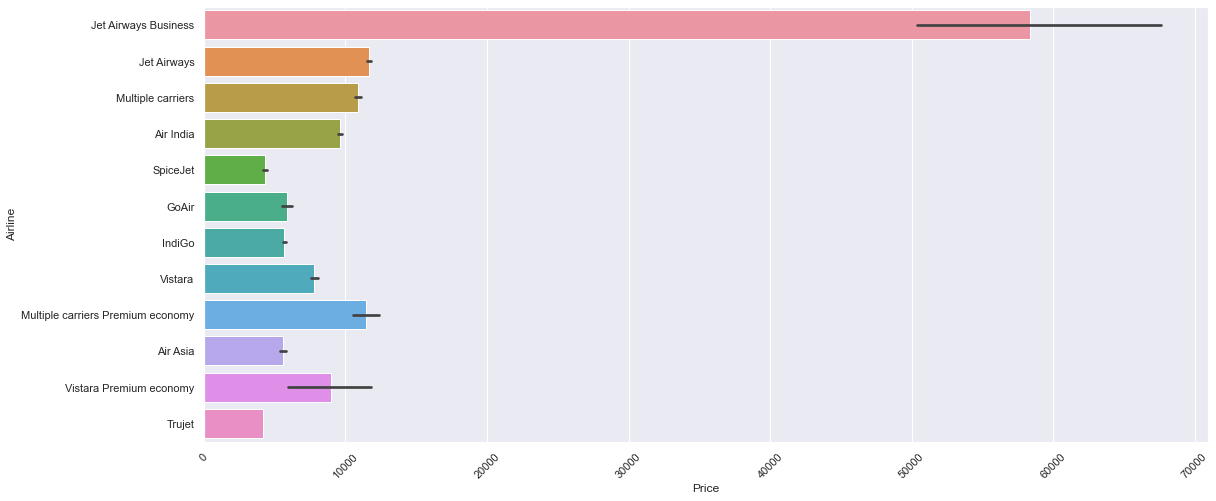

In [172]:
sns.set()
plt.figure(figsize=(18,8))
sns.barplot(y='Airline',x='Price',data=train_df.sort_values('Price',ascending=False))
plt.xticks(rotation=45)
plt.show()

As we can see that Jet Airways Business has the highest fare and Trujet and Spicejet has the least fare price.

In [173]:
Airline=train_df[['Airline']]

In [174]:
Airline=pd.get_dummies(Airline,drop_first=True)

In [175]:
Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [176]:
train_df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

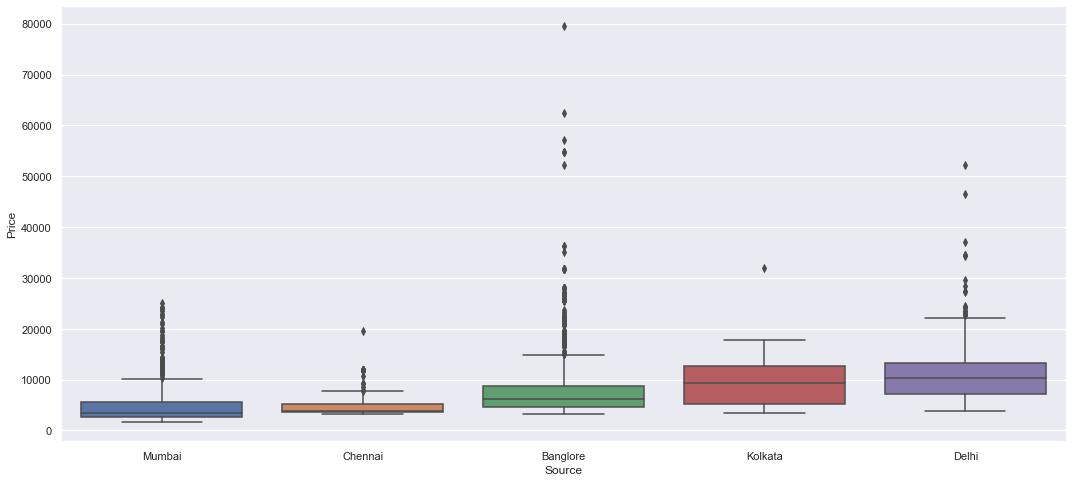

In [177]:
plt.figure(figsize=(18,8))
sns.boxplot(x='Source',y='Price',data=train_df.sort_values('Price',ascending=True))

In [178]:
Source=train_df[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [179]:
Destination=train_df[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [180]:
train_df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → RPR → HYD → BLR       1
CCU → IXA → BLR             1
BLR → BOM → IXC → DEL       1
BOM → JAI → DEL → HYD       1
BOM → UDR → DEL → HYD       1
Name: Route, Length: 128, dtype: int64

In [181]:
train_df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [182]:
# Here we can drop the Route and Additional info as it does not much impact in the price of the flight
train_df.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [183]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [184]:
train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [185]:
train_df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [186]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [187]:
df_train=pd.concat([train_df,Airline,Source,Destination],axis=1)

In [188]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [189]:
df_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [190]:
df_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [191]:
df_train.shape

(10682, 30)

# Test Set

In [192]:
test_data = pd.read_excel('Test_set.xlsx')

In [193]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [194]:
test_data['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [195]:
# Preprocessing
print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline=test_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [196]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


As our data is almost all catagorical there is no need to treat the outliers and Skewness. Hence we will move ahead with the other process.

<AxesSubplot:>

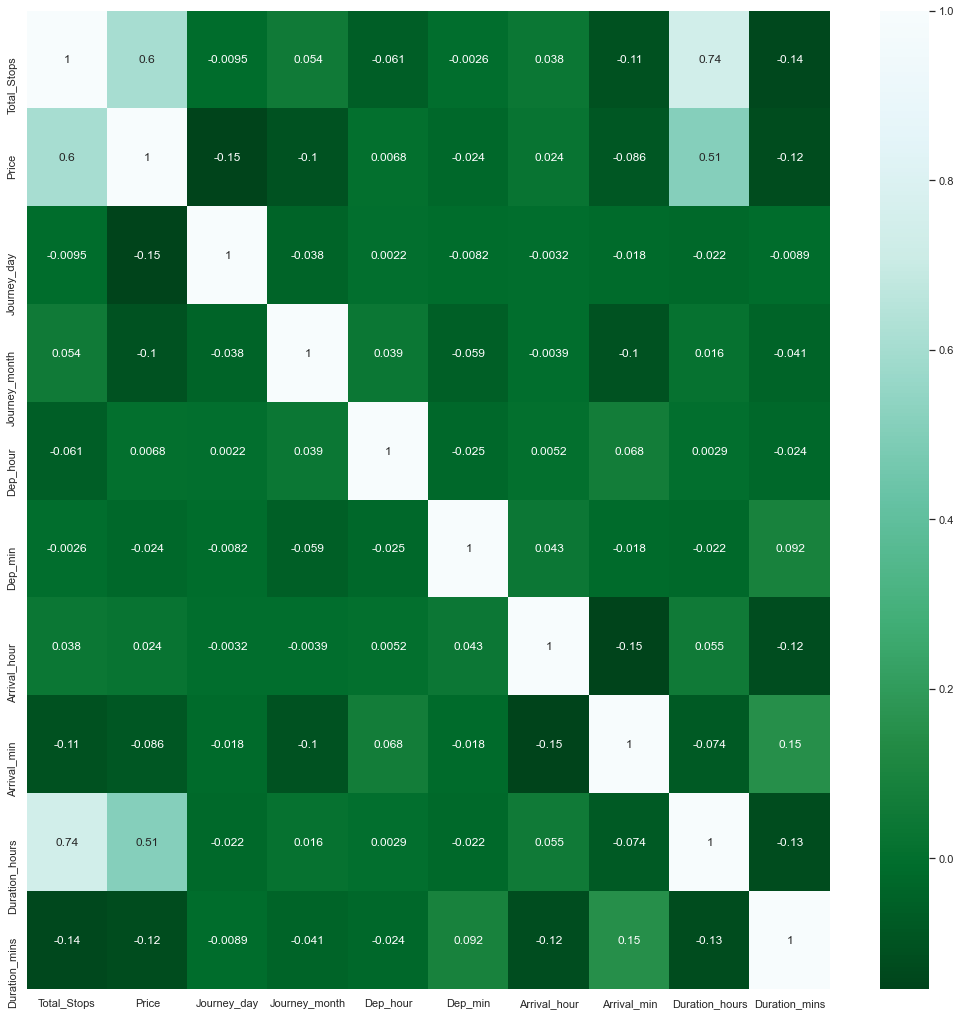

In [197]:
plt.figure(figsize=(18,18))
sns.heatmap(train_df.corr(),annot=True,cmap='BuGn_r')

### Observation:

1: As we can see that there is high correlation between the target variable Price and Duration_hours column.

2: There is not much positive or negative correlation between any other columns and target varibale Price.

# Splitting into X and y

In [198]:
X = df_train.drop(['Price'], axis = 1)
y = df_train['Price']

In [199]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [200]:
print(selection.feature_importances_)

[2.20170849e-01 1.44485627e-01 5.20700037e-02 2.45296956e-02
 2.16015165e-02 2.71288698e-02 1.95202230e-02 1.21684774e-01
 1.77691582e-02 9.23617171e-03 1.98474771e-03 1.98995335e-02
 1.43571634e-01 6.79987884e-02 1.87207435e-02 8.54257034e-04
 3.53163233e-03 1.25072257e-04 4.70169645e-03 8.42642546e-05
 3.61342672e-04 1.05826296e-02 3.71196773e-03 7.02830314e-03
 1.26388935e-02 1.43449602e-02 6.17684577e-03 5.14276876e-04
 2.49715231e-02]


<AxesSubplot:>

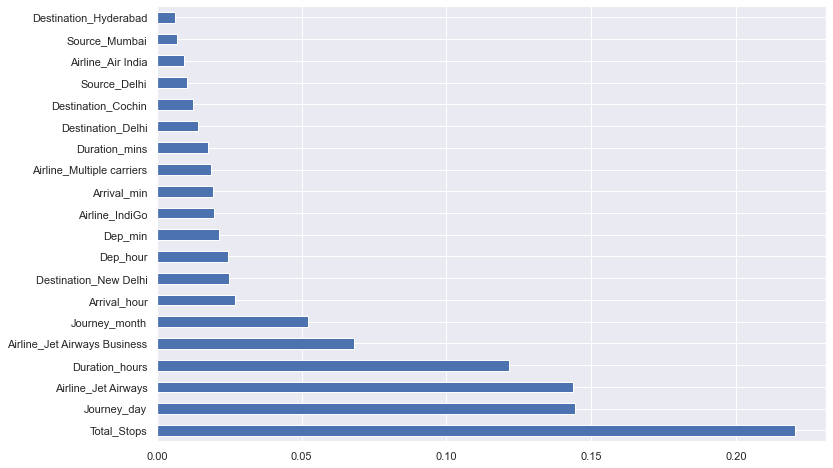

In [202]:
plt.figure(figsize=(12,8))
feat_importance=pd.Series(selection.feature_importances_,index=X.columns)
feat_importance.nlargest(20).plot(kind='barh')

As we can see from this we can say that the Journey_day and Total_Stops Columns has the highest importance for our model Training.

In [203]:
X

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


As all our columns our either feature extracted from the catagorical columns and onehot encoded we don't need to scale them. So we will train the model as it is.

# Model Building

In [204]:
## Importing machine learning Library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from xgboost import XGBRegressor

In [205]:
def maxr2_score(clf,x,y):
    maxr2_score1=0
    for i in range(100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean())
    print('\n')
    print('Difference =', maxr2_score1 - cross_val_score(clf,x,y,scoring='r2').mean())
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std())
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test))
    print('\n')
    print('MAE',mean_absolute_error(y_test,pred))
    print('\n')
    print('MSE',mean_squared_error(y_test,pred))
    print('\n')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    sns.regplot(pred,y_test)
    return final_r

max r2 score corresponding to 57 is 0.679792644911887


cross validation score 0.6199027318916419


Difference = 0.059889913020245045
Standard Deviation 0.019257859247068503


Training accuracy 0.6227718917193439


Test Accuracy 0.6251575694246299


MAE 1926.2719645905026


MSE 7306560.753606839


RMSE 2703.065066476728




57

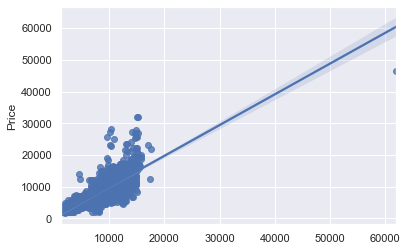

In [206]:
#Linear Regression
LR = LinearRegression()
maxr2_score(LR, X, y)

max r2 score corresponding to 79 is 0.6642457193100658


cross validation score 0.6185922761939494


Difference = 0.04565344311611641
Standard Deviation 0.01660907563355239


Training accuracy 0.6208083272337952


Test Accuracy 0.6295687777888492


MAE 1923.6309770338987


MSE 7220575.925633883


RMSE 2687.1129350352735




79

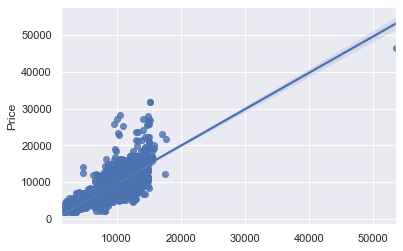

In [207]:
ridge = Ridge()
maxr2_score(ridge, X, y)

max r2 score corresponding to 57 is 0.6772484843955442


cross validation score 0.6196947873656187


Difference = 0.05755369702992552
Standard Deviation 0.01874882062790624


Training accuracy 0.6224239233077187


Test Accuracy 0.626201125758433


MAE 1925.5508146811726


MSE 7286219.385792528


RMSE 2699.299795464099




57

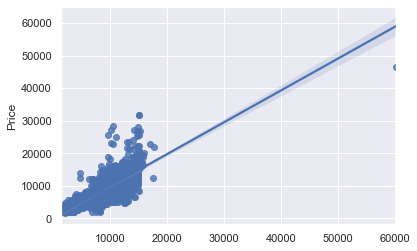

In [208]:
lasso = Lasso()
maxr2_score(lasso, X,y)

max r2 score corresponding to 98 is 0.5061619419746861


cross validation score 0.43257661620618737


Difference = 0.07358532576849874
Standard Deviation 0.004006258608859791


Training accuracy 0.4264424597213149


Test Accuracy 0.47452729349460254


MAE 2349.1294426305003


MSE 10242699.17509221


RMSE 3200.421718319667




98

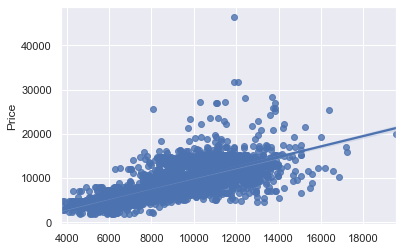

In [209]:
EN = ElasticNet()
maxr2_score(EN, X, y)

max r2 score corresponding to 94 is 0.7853323854293921


cross validation score 0.7021609582783739


Difference = 0.07345634653036826
Standard Deviation 0.035755885339316076


Training accuracy 0.9720625164365646


Test Accuracy 0.7076569310953104


MAE 1363.105732335049


MSE 5698454.122627646


RMSE 2387.143506919441




94

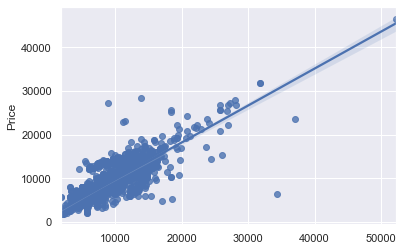

In [210]:
#### Decision Tree
DT=DecisionTreeRegressor()
maxr2_score(DT,X,y)

max r2 score corresponding to 76 is 0.6314635512743382


cross validation score 0.5850009290076714


Difference = 0.04646262226666675
Standard Deviation 0.022190756995764248


Training accuracy 0.7270922852067707


Test Accuracy 0.6312531776465722


MAE 1788.534955545157


MSE 7187743.0100140385


RMSE 2680.996644909135




76

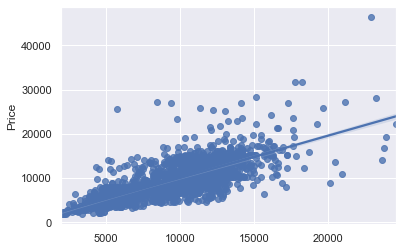

In [211]:
## KNN
KNN = KNeighborsRegressor()
maxr2_score(KNN,X,y)

max r2 score corresponding to 64 is 0.022062409810108652


cross validation score 0.0037593589359373957


Difference = 0.018303050874171257
Standard Deviation 0.009368038267526161


Training accuracy 0.0032088700995204222


Test Accuracy 0.010978599260949018


MAE 3477.941123421219


MSE 19278353.68057192


RMSE 4390.712206530044




64

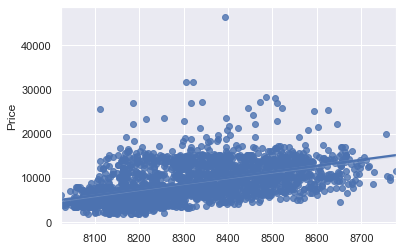

In [212]:
##SVm
SVM = SVR()
maxr2_score(SVM , X, y)

max r2 score corresponding to 13 is 0.8451555061991907


cross validation score 0.8133134969813014


Difference = 0.031905214117480485
Standard Deviation 0.02707189129941381


Training accuracy 0.9557245783249163


Test Accuracy 0.8141640638320279


MAE 1198.761124134912


MSE 3622379.5575396353


RMSE 1903.254990152301




13

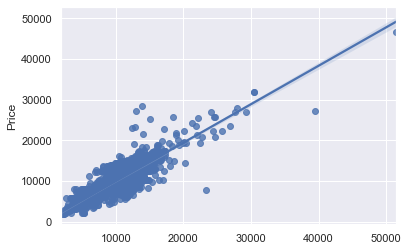

In [213]:
## random Forest
RF =RandomForestRegressor()
maxr2_score(RF , X, y)

max r2 score corresponding to 42 is 0.5663985241017218


cross validation score 0.3049801193178159


Difference = 0.2138639350400377
Standard Deviation 0.1168560028786678


Training accuracy 0.34086525217433217


Test Accuracy 0.2732068471729284


MAE 3185.514550324185


MSE 14166908.261386637


RMSE 3763.8953573906165




42

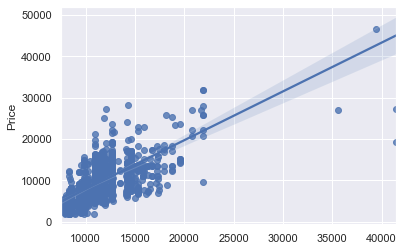

In [214]:
## AdaBoost
Adb=AdaBoostRegressor()
maxr2_score(Adb,X,y)

max r2 score corresponding to 75 is 0.8079418715358144


cross validation score 0.768938552486345


Difference = 0.03917221631229173
Standard Deviation 0.014516714397549379


Training accuracy 0.7906013567844249


Test Accuracy 0.7791318848790203


MAE 1510.510028007331


MSE 4305239.135252009


RMSE 2074.907018459384




75

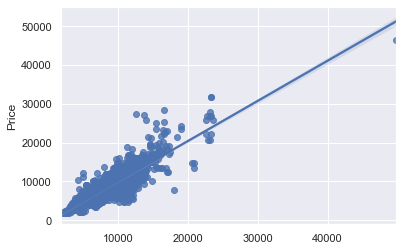

In [215]:
## Gradient Boost
gnb=GradientBoostingRegressor()
maxr2_score(gnb,X,y)

max r2 score corresponding to 75 is 0.8781927644500176


cross validation score 0.8482358657117718


Difference = 0.029956898738245807
Standard Deviation 0.006769858452992719


Training accuracy 0.9354528941275233


Test Accuracy 0.8460667148364278


MAE 1160.3314912159642


MSE 3000521.8414668688


RMSE 1732.2014436741672




75

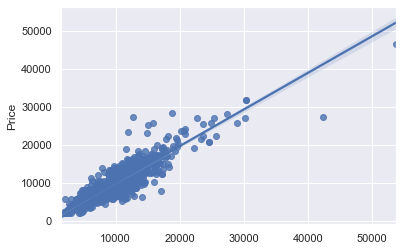

In [216]:
#XGBoost Regressor
XGB = XGBRegressor()
maxr2_score(XGB, X, y)

From the above all models it is clear that XGBRegressor gives the best performance. It has least difference between the R2_score and crossval score and also the Training and Test result is very good. We will further tune the XGBRegressor model.

# Hyper Parameter Tuning

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=75)
XGBR = XGBRegressor()
param = {'learning_rate': [0.01, 0.1],
         'max_depth': [3, 5, 7, 10],
         'min_child_weight': [1, 3, 5],
         'subsample': [0.5, 0.7],
         'colsample_bytree': [0.5, 0.7],
         'n_estimators': [100, 200, 500]}
grid = GridSearchCV(estimator= XGBR, param_grid = param, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print('Best score is {} for the best parameter {}'.format(grid.best_score_, grid.best_params_))

Best score is 0.8288597250164816 for the best parameter {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.7}


As we can see that by hyperparameter tuning the r2_score further decreases, hence we will keep the default paramter for the XGBRegressor.

max r2 score corresponding to 75 is 0.8781927644500176


cross validation score 0.8482358657117718


Difference = 0.029956898738245807
Standard Deviation 0.006769858452992719


Training accuracy 0.9354528941275233


Test Accuracy 0.8460667148364278


MAE 1160.3314912159642


MSE 3000521.8414668688


RMSE 1732.2014436741672




75

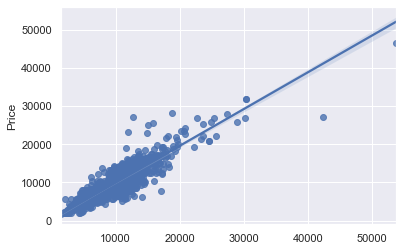

In [218]:
XGB = XGBRegressor()
maxr2_score(XGB, X, y)

We will finally save our model and then load it to predict our test dataset.

# Saving and loading the model

In [219]:
import joblib
joblib.dump(XGB, 'Flight_XGB.pkl')

['Flight_XGB.pkl']

In [ ]:
model = joblib.load('Flight_XGB.pkl')
prediction = model.predict(data_test)
